['random', 'thr_975_qonly', 'thr_975_hnns']
['random', 'thr_690_qonly', 'thr_690_hnns']
['random', 'thr_400_qonly', 'thr_400_hnns']
['random', 'thr_775_qonly', 'thr_775_hnns']
['random', 'thr_960_qonly', 'thr_960_hnns']


['random', 'thr_990_qonly', 'thr_990_hnns']


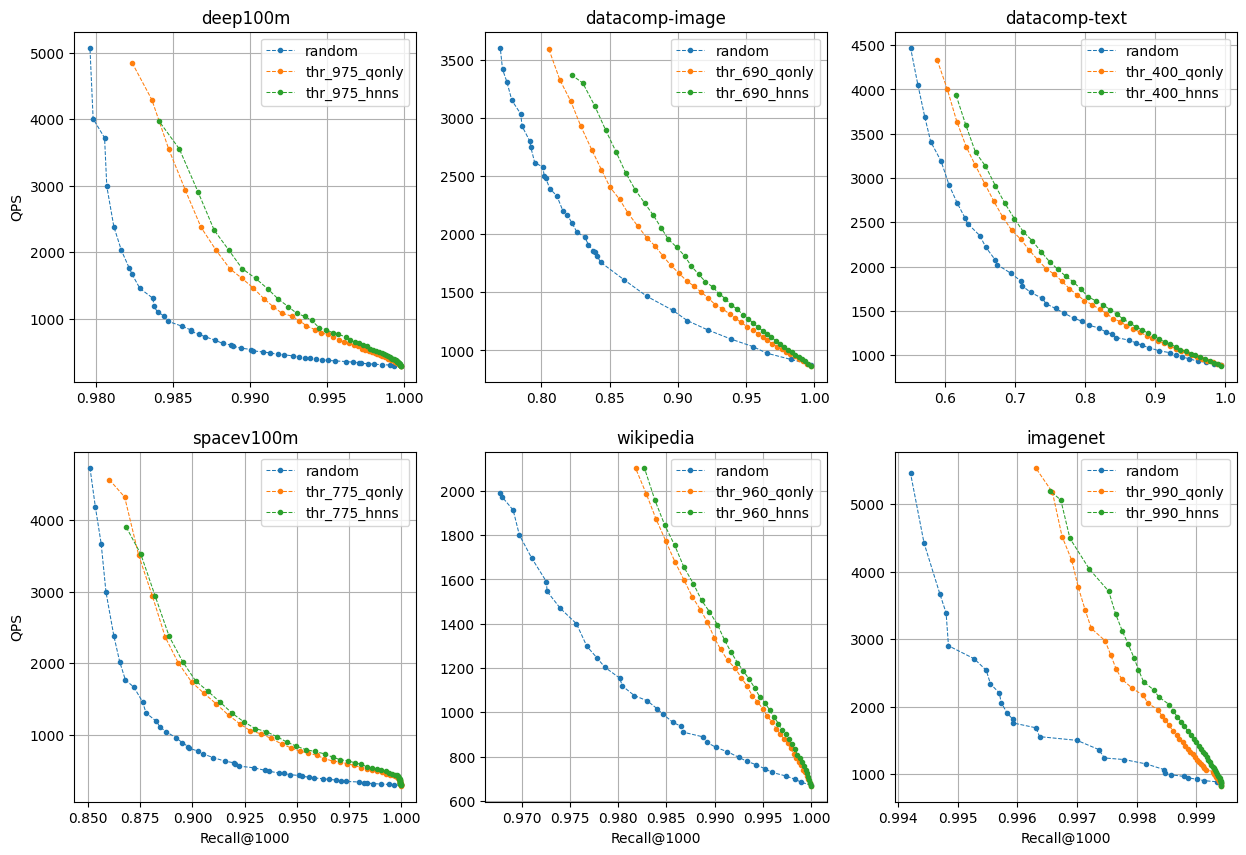

In [55]:
import os
import numpy as np
import json
import matplotlib.pyplot as plt

dataset = 'datacomp-image.base'     # thr=690
dataset = 'datacomp-text.base'      # thr=400
dataset = 'spacev100m.base'         # thr=775
dataset = 'wikipedia.base'          # thr=960
dataset = 'imagenet.base'           # thr=990
dataset = 'deep100m.base'           # thr=975
log_path = "/home/zhengweiguo/liuchengjun/HybridNNS/log/"
config = json.loads(open('config.json').read())
datasets = ["deep100m.base", "datacomp-image.base", "datacomp-text.base", "spacev100m.base",
            "wikipedia.base", "imagenet.base"]


plt.figure(figsize=(15, 10))

for idx, dataset in enumerate(datasets):
    plt.subplot(2, 3, idx + 1)
    M, efs = config[dataset]["M"], config[dataset]["efs"]
    thrs = config[dataset]["thresholds"]
    best_thr = [config[dataset]["best_thr"]]
    dim = config[dataset]["dim"]
    efc = 1000
    ck_ts = 0
    k = 1000

    num_threads = 48

    def get_recall_time(prefix):
        recall_time = []
        logfile_path = os.path.join(log_path, prefix)
        if os.path.exists(logfile_path) == False:
            print(f'{logfile_path} does not exist')
            return []
        with open(logfile_path, 'r') as f:
            lines = f.readlines()
            curr = []
            for line in lines:
                if 'model_path' in line: continue
                if 'E2E time: ' in line:
                    curr.append(float(line.split(': ')[1]))
                elif f'Recall@{k}' in line:
                    avg = np.mean(curr)
                    curr.clear()
                    curr.append(avg)
                    curr.append(float(line.split(': ')[1]))
                    recall_time.append((curr[1], curr[0]))
                    curr = []
                    
        def pareto_frontier(points):
            points = sorted(points, key=lambda x: (-x[0], x[1]))
            frontier = []
            for point in points:
                if len(frontier) == 0 or point[1] < frontier[-1][1]:
                    frontier.append(point)
            return frontier
        
        recall_time = pareto_frontier(recall_time)
        # print(prefix)
        # for recall, time in recall_time:
        #     print(f'({recall:.2f} {time:.2f})', end=', ')
        # print()
        plt.plot([x[0] for x in recall_time], [10000 / x[1] for x in recall_time], '.--', linewidth=0.75)
        return recall_time

    legends = []

    method = 'random'
    prefix = f'{dataset}.M_{M}.efc_{efc}.efs_{efs}.ck_ts_{ck_ts}.ncheck_100.recall@{k}.nthread_{num_threads}.{method}.log'
    recall_time_random = get_recall_time(prefix)
    if recall_time_random != []: 
        legends.append(f'{method}')

    method = 'qonly'
    for thr in best_thr:
        prefix = f'{dataset}.M_{M}.efc_{efc}.efs_{efs}.ck_ts_{ck_ts}.ncheck_100.recall@{k}.thr_{thr}.nthread_{num_threads}.{method}.log'
        recall_time_qonly = get_recall_time(prefix)
        if recall_time_qonly != []: 
            legends.append(f'thr_{thr}_{method}')

    method = 'hnns'
    for thr in best_thr:
        prefix = f'{dataset}.M_{M}.efc_{efc}.efs_{efs}.ck_ts_{ck_ts}.ncheck_100.recall@{k}.thr_{thr}.nthread_{num_threads}.{method}.log'
        recall_time_hnns = get_recall_time(prefix)
        if recall_time_hnns != []: 
            legends.append(f'thr_{thr}_{method}')

    print(legends)


    plt.legend(legends)
    plt.grid()
    # min_recall = min([x[0] for x in recall_time_random + recall_time_qonly + recall_time_hnns])
    # max_recall = max([x[0] for x in recall_time_random + recall_time_qonly + recall_time_hnns])
    # margin = (max_recall - min_recall) * 0.01
    # plt.xlim(min_recall - margin)
    if idx // 3 == 1:
        plt.xlabel(f'Recall@1000')
    plt.title(f'{dataset[:-5]}')    # num_threads={num_threads}
    if idx % 3 == 0:
        plt.ylabel('QPS')

plt.savefig(f'GPU_budget_qps_recall.pdf', dpi=500, bbox_inches='tight')
plt.show()

deep100m.base.M_32.efc_1000.efs_1000.ck_ts_0.ncheck_100.recall@1000.nthread_4.random.log
(1.00 34.19), (1.00 33.74), (1.00 32.93), (1.00 32.24), (1.00 31.73), (1.00 30.87), (1.00 30.30), (1.00 29.56), (1.00 28.96), (1.00 28.09), (1.00 27.33), (1.00 26.80), (0.99 26.01), (0.99 25.42), (0.99 24.61), (0.99 24.00), (0.99 23.37), (0.99 22.68), (0.99 21.85), (0.99 21.60), (0.99 20.56), (0.99 19.95), (0.99 19.31), (0.99 18.65), (0.99 17.81), (0.99 16.92), (0.99 16.47), (0.99 15.78), (0.99 14.62), (0.99 13.56), (0.99 12.93), (0.99 12.25), (0.99 11.91), (0.99 11.15), (0.98 10.80), 
deep100m.base.M_32.efc_1000.efs_1000.ck_ts_0.ncheck_100.recall@1000.thr_975.nthread_4.qonly.log
(1.00 34.46), (1.00 33.99), (1.00 33.22), (1.00 32.48), (1.00 31.70), (1.00 31.06), (1.00 30.65), (1.00 29.81), (1.00 29.07), (1.00 28.75), (1.00 27.65), (1.00 27.08), (1.00 26.35), (1.00 25.63), (1.00 25.32), (1.00 24.21), (1.00 23.71), (1.00 23.00), (1.00 22.48), (1.00 21.85), (1.00 20.84), (1.00 20.27), (1.00 19.56), (1

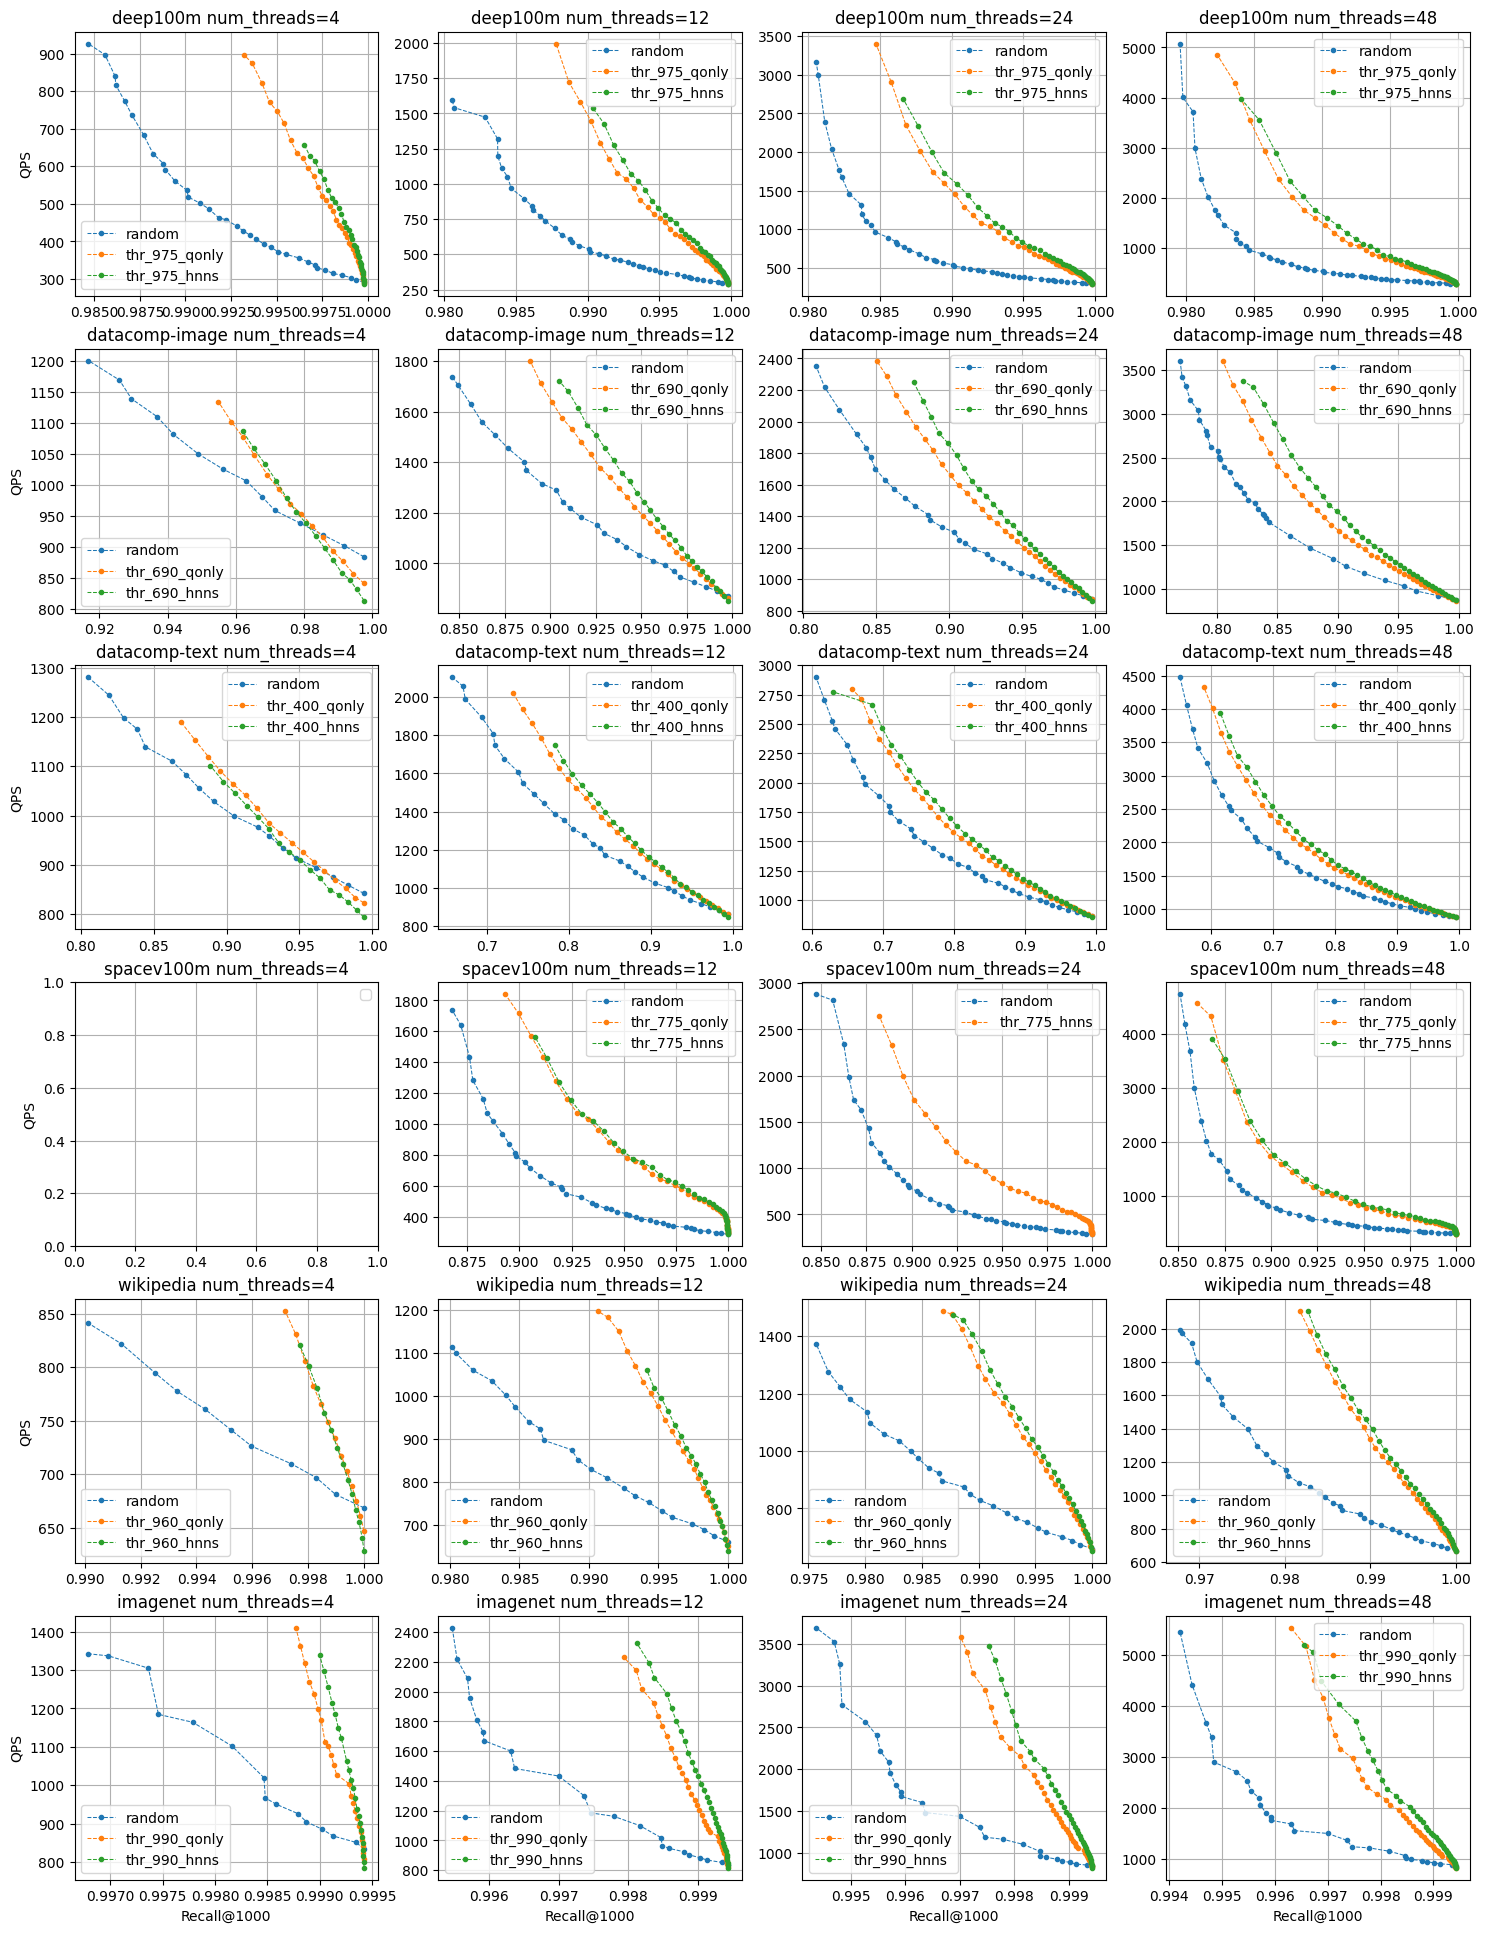

In [54]:
import os
import numpy as np
import json
import matplotlib.pyplot as plt

dataset = 'datacomp-image.base'     # thr=690
dataset = 'datacomp-text.base'      # thr=400
dataset = 'spacev100m.base'         # thr=775
dataset = 'wikipedia.base'          # thr=960
dataset = 'imagenet.base'           # thr=990
dataset = 'deep100m.base'           # thr=975
log_path = "/home/zhengweiguo/liuchengjun/HybridNNS/log/"
config = json.loads(open('config.json').read())
datasets = [
    "deep100m.base", 
    "datacomp-image.base", 
    "datacomp-text.base", 
    "spacev100m.base",
    "wikipedia.base", "imagenet.base"
]
nts = [4, 12, 24, 48]

plt.figure(figsize=(18, 24))

for idx_dataset, dataset in enumerate(datasets):
    M, efs = config[dataset]["M"], config[dataset]["efs"]
    thrs = config[dataset]["thresholds"]
    best_thr = [config[dataset]["best_thr"]]
    dim = config[dataset]["dim"]
    efc = 1000
    ck_ts = 0
    k = 1000

    for idx_nt, num_threads in enumerate(nts):
        idx = idx_dataset * 4 + idx_nt
        plt.subplot(len(datasets), 4, idx + 1)
        def get_recall_time(prefix):
            recall_time = []
            logfile_path = os.path.join(log_path, prefix)
            if os.path.exists(logfile_path) == False:
                print(f'{logfile_path} does not exist')
                return []
            with open(logfile_path, 'r') as f:
                lines = f.readlines()
                curr = []
                for line in lines:
                    if 'model_path' in line: continue
                    if 'E2E time: ' in line:
                        curr.append(float(line.split(': ')[1]))
                    elif f'Recall@{k}' in line:
                        avg = np.mean(curr)
                        curr.clear()
                        curr.append(avg)
                        curr.append(float(line.split(': ')[1]))
                        recall_time.append((curr[1], curr[0]))
                        curr = []
                        
            def pareto_frontier(points):
                points = sorted(points, key=lambda x: (-x[0], x[1]))
                frontier = []
                for point in points:
                    if len(frontier) == 0 or point[1] < frontier[-1][1]:
                        frontier.append(point)
                return frontier
            
            recall_time = pareto_frontier(recall_time)
            print(prefix)
            for recall, time in recall_time:
                print(f'({recall:.2f} {time:.2f})', end=', ')
            print()
            plt.plot([x[0] for x in recall_time], [10000 / x[1] for x in recall_time], '.--', linewidth=0.75)
            return recall_time

        legends = []

        method = 'random'
        prefix = f'{dataset}.M_{M}.efc_{efc}.efs_{efs}.ck_ts_{ck_ts}.ncheck_100.recall@{k}.nthread_{num_threads}.{method}.log'
        recall_time_random = get_recall_time(prefix)
        if recall_time_random != []: 
            legends.append(f'{method}')

        method = 'qonly'
        for thr in best_thr:
            prefix = f'{dataset}.M_{M}.efc_{efc}.efs_{efs}.ck_ts_{ck_ts}.ncheck_100.recall@{k}.thr_{thr}.nthread_{num_threads}.{method}.log'
            recall_time_qonly = get_recall_time(prefix)
            if recall_time_qonly != []: 
                legends.append(f'thr_{thr}_{method}')

        method = 'hnns'
        for thr in best_thr:
            prefix = f'{dataset}.M_{M}.efc_{efc}.efs_{efs}.ck_ts_{ck_ts}.ncheck_100.recall@{k}.thr_{thr}.nthread_{num_threads}.{method}.log'
            recall_time_hnns = get_recall_time(prefix)
            if recall_time_hnns != []: 
                legends.append(f'thr_{thr}_{method}')

        print(legends)

        plt.legend(legends)
        plt.grid()
        if idx // 4 == len(datasets) - 1:
            plt.xlabel(f'Recall@1000')
        plt.title(f'{dataset[:-5]} num_threads={num_threads}')    # 
        if idx % 4 == 0:
            plt.ylabel('QPS')

plt.savefig(f'num_threads_qps_recall.pdf', dpi=500, bbox_inches='tight')
plt.show()

deep100m.base.M_32.efc_1000.efs_1000.ck_ts_0.ncheck_100.recall@1000.nthread_48.random.log
(1.00 34.21), (1.00 33.76), (1.00 33.00), (1.00 32.28), (1.00 31.75), (1.00 30.86), (1.00 30.28), (1.00 29.59), (1.00 28.91), (1.00 28.07), (1.00 27.29), (1.00 26.78), (0.99 26.01), (0.99 25.41), (0.99 24.63), (0.99 24.01), (0.99 23.35), (0.99 22.75), (0.99 21.85), (0.99 21.57), (0.99 20.56), (0.99 19.96), (0.99 19.31), (0.99 18.62), (0.99 17.91), (0.99 17.03), (0.99 16.57), (0.99 15.89), (0.99 14.71), (0.99 13.66), (0.99 13.03), (0.99 12.35), (0.99 12.02), (0.99 11.27), (0.98 10.41), (0.98 9.58), (0.98 9.10), (0.98 8.41), (0.98 7.67), (0.98 6.88), (0.98 6.01), (0.98 5.68), (0.98 4.93), (0.98 4.19), (0.98 3.34), (0.98 2.69), (0.98 2.50), (0.98 1.97), 
deep100m.base.M_32.efc_1000.efs_1000.ck_ts_0.ncheck_100.recall@1000.thr_970.nthread_48.qonly.log
(1.00 34.46), (1.00 33.97), (1.00 33.18), (1.00 32.48), (1.00 31.65), (1.00 31.04), (1.00 30.62), (1.00 29.77), (1.00 29.05), (1.00 28.69), (1.00 27.60),

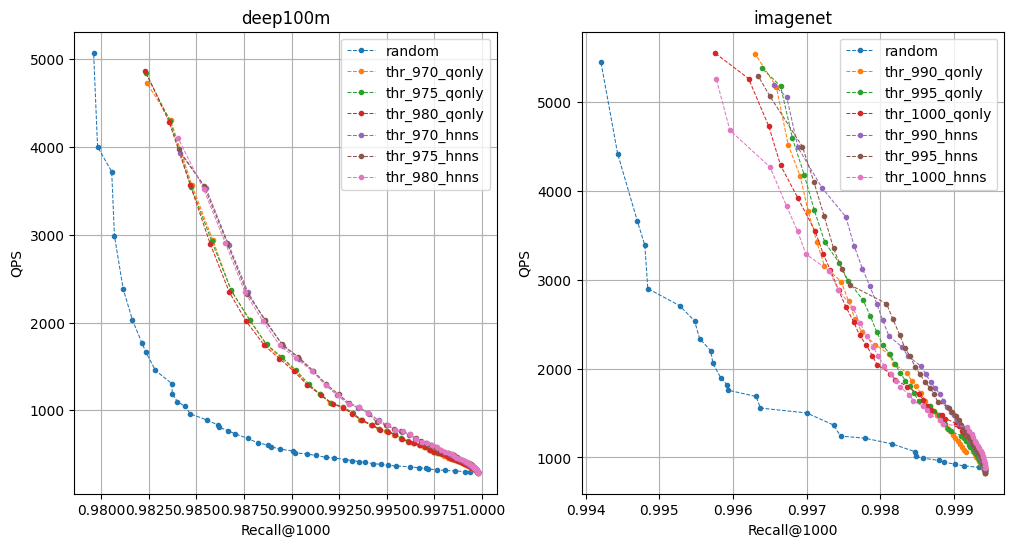

In [34]:
import os
import numpy as np
import json
import matplotlib.pyplot as plt

dataset = 'datacomp-image.base'     # thr=690
dataset = 'datacomp-text.base'      # thr=400
dataset = 'spacev100m.base'         # thr=775
dataset = 'wikipedia.base'          # thr=960
dataset = 'imagenet.base'           # thr=990
dataset = 'deep100m.base'           # thr=975
log_path = "/home/zhengweiguo/liuchengjun/HybridNNS/log/"
config = json.loads(open('config.json').read())
datasets = ["deep100m.base", "imagenet.base"]


plt.figure(figsize=(12, 6))

for idx, dataset in enumerate(datasets):
    plt.subplot(1, 2, idx + 1)
    M, efs = config[dataset]["M"], config[dataset]["efs"]
    thrs = config[dataset]["thresholds"]
    best_thr = [config[dataset]["best_thr"]]
    dim = config[dataset]["dim"]
    efc = 1000
    ck_ts = 0
    k = 1000

    num_threads = 48

    def get_recall_time(prefix):
        recall_time = []
        logfile_path = os.path.join(log_path, prefix)
        if os.path.exists(logfile_path) == False:
            print(f'{logfile_path} does not exist')
            return []
        with open(logfile_path, 'r') as f:
            lines = f.readlines()
            curr = []
            for line in lines:
                if 'model_path' in line: continue
                if 'E2E time: ' in line:
                    curr.append(float(line.split(': ')[1]))
                elif f'Recall@{k}' in line:
                    avg = np.mean(curr)
                    curr.clear()
                    curr.append(avg)
                    curr.append(float(line.split(': ')[1]))
                    recall_time.append((curr[1], curr[0]))
                    curr = []
                    
        def pareto_frontier(points):
            points = sorted(points, key=lambda x: (-x[0], x[1]))
            frontier = []
            for point in points:
                if len(frontier) == 0 or point[1] < frontier[-1][1]:
                    frontier.append(point)
            return frontier
        
        recall_time = pareto_frontier(recall_time)
        print(prefix)
        for recall, time in recall_time:
            print(f'({recall:.2f} {time:.2f})', end=', ')
        print()
        plt.plot([x[0] for x in recall_time], [10000 / x[1] for x in recall_time], '.--', linewidth=0.75)
        return recall_time

    legends = []

    method = 'random'
    prefix = f'{dataset}.M_{M}.efc_{efc}.efs_{efs}.ck_ts_{ck_ts}.ncheck_100.recall@{k}.nthread_{num_threads}.{method}.log'
    recall_time_random = get_recall_time(prefix)
    if recall_time_random != []: 
        legends.append(f'{method}')

    method = 'qonly'
    for thr in thrs:
        prefix = f'{dataset}.M_{M}.efc_{efc}.efs_{efs}.ck_ts_{ck_ts}.ncheck_100.recall@{k}.thr_{thr}.nthread_{num_threads}.{method}.log'
        recall_time_qonly = get_recall_time(prefix)
        if recall_time_qonly != []: 
            legends.append(f'thr_{thr}_{method}')

    method = 'hnns'
    for thr in thrs:
        prefix = f'{dataset}.M_{M}.efc_{efc}.efs_{efs}.ck_ts_{ck_ts}.ncheck_100.recall@{k}.thr_{thr}.nthread_{num_threads}.{method}.log'
        recall_time_hnns = get_recall_time(prefix)
        if recall_time_hnns != []: 
            legends.append(f'thr_{thr}_{method}')

    print(legends)


    plt.legend(legends)
    plt.grid()
    plt.xlabel(f'Recall@1000')
    plt.title(f'{dataset[:-5]}')    # num_threads={num_threads}
    if idx == 0:
        plt.ylabel('QPS')

plt.savefig(f'GPU_budget_qps_recall.pdf', dpi=500, bbox_inches='tight')
plt.show()